<a href="https://colab.research.google.com/github/khairav/MachinLearning-Mini_Project/blob/main/PercobaanSubmissionKlasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
!ls

drive  sample_data


In [6]:
%cd "/content/drive/My Drive/MachineLearningProject"
!ls


/content/drive/My Drive/MachineLearningProject


In [7]:
#import Library 
 
import itertools
 
 
import matplotlib.pylab as plt
import numpy as np
 
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.4.1
Hub version: 0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT AVAILABLE


In [8]:
#Pilih modul TF2 SavedModel untuk digunakan
model_name = "mobilenet_v3_small_100_224" # @param ['bit_s-r50x1', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'inception_v3', 'inception_resnet_v2', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152']

model_handle_map = {
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"Selected model: {model_name} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 32

Selected model: mobilenet_v3_small_100_224 : https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5
Input size (224, 224)


In [9]:
#import Dataset Image
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-04-17 16:44:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  2.14MB/s    in 3m 6s   

2021-04-17 16:47:09 (1.66 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [10]:
#ekstraksi File Sip
import zipfile
import os
my_zip = '/content/drive/MyDrive/MachineLearningProject/rockpaperscissors.zip'
 
zip_ref= zipfile.ZipFile(my_zip, 'r')
zip_ref.extractall('//content/drive/MyDrive/MachineLearningProject/')
zip_ref.close()
 
base_dir = '/content/drive/MyDrive/MachineLearningProject/rockpaperscissors/'

In [12]:
# mengecek file pada direktori
print("Isi direktori: ", os.listdir())

Isi direktori:  ['rockpaperscissors.zip', 'rockpaperscissors', '__MACOSX']


In [14]:
#Check Jumlah Data Image
os.chdir("/content/drive/MyDrive/MachineLearningProject/rockpaperscissors/")
jmlrock = len(os.listdir('/content/drive/MyDrive/MachineLearningProject/rockpaperscissors/rock'))
jmlpaper = len(os.listdir('/content/drive/MyDrive/MachineLearningProject/rockpaperscissors/paper'))
jmlsci = len(os.listdir('/content/drive/MyDrive/MachineLearningProject/rockpaperscissors/scissors'))
print("Jumlah gambar rock: ", jmlrock)
print("Jumlah gambar paper: ", jmlpaper)
print("Jumlah gambar scissors: ", jmlsci)

Jumlah gambar rock:  726
Jumlah gambar paper:  712
Jumlah gambar scissors:  750


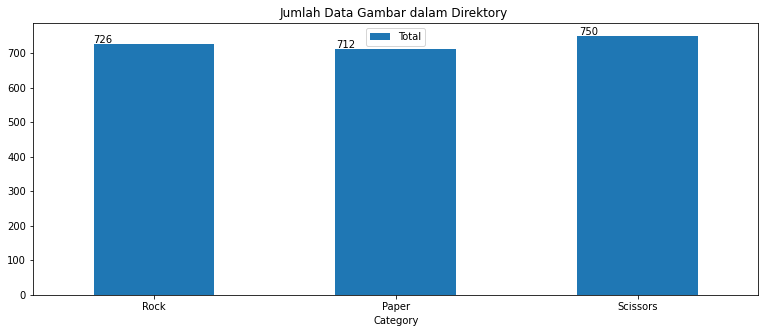

In [18]:
#visualisasi Jumlah Image dalam folder 'Rock', 'Paper', 'Scissors'
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data_dir = pd.DataFrame({'Category': ['Rock', 'Paper', 'Scissors'], 'Total': [jmlrock, jmlpaper, jmlsci]})
ax = data_dir.plot.bar(x='Category', y='Total', rot=0, figsize=(13, 5))
plt.title('Jumlah Data Gambar dalam Direktory ')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [44]:
# menentukan nama direktori untuk training data dan validation data
base_dir = '/content/drive/MyDrive/MachineLearningProject/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')

In [45]:
# membuat direktori untuk data training dan data validation
os.mkdir(train_dir)
os.mkdir(validation_dir)


In [46]:
# menentukan direktori untuk tiap kategori gambar (rock, paper, dan scissors)
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [47]:
# membagi data training dan data validation menggunakan library sklearn dengan test_size 0.4
from sklearn.model_selection import train_test_split
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [48]:
# menentukan direktori training data untuk setiap kategori (kelas)
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

In [49]:
# menentukan direktori validation data untuk setiap kategori (kelas)
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [50]:
# membuat direktori baru untuk data training untuk setiap kategori (kelas) dalam directory train dan val
os.mkdir(os.path.join(train_rock))
os.mkdir(os.path.join(train_paper))
os.mkdir(os.path.join(train_scissors))

In [51]:
# membuat direktori baru untuk data validation untuk setiap kategori (kelas) dalam directory train dan val
os.mkdir(os.path.join(val_rock))
os.mkdir(os.path.join(val_paper))
os.mkdir(os.path.join(val_scissors))

In [52]:
# meng-copy data training ke dalam direktori baru menggunakan library shutil
import shutil
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

In [53]:
# mengecek jumlah data training
jmltrainpaper = len(os.listdir('/content/drive/MyDrive/MachineLearningProject/rockpaperscissors/train/paper'))
jmltrainrock = len(os.listdir('/content/drive/MyDrive/MachineLearningProject/rockpaperscissors/train/rock'))
jmltrainsci = len(os.listdir('/content/drive/MyDrive/MachineLearningProject/rockpaperscissors/train/scissors'))
print("Jumlah data training kategori rock: ", jmltrainrock)
print("Jumlah data training kategori paper: ", jmltrainpaper)
print("Jumlah data training kategori scissors: ", jmltrainsci)

Jumlah data training kategori rock:  435
Jumlah data training kategori paper:  427
Jumlah data training kategori scissors:  450


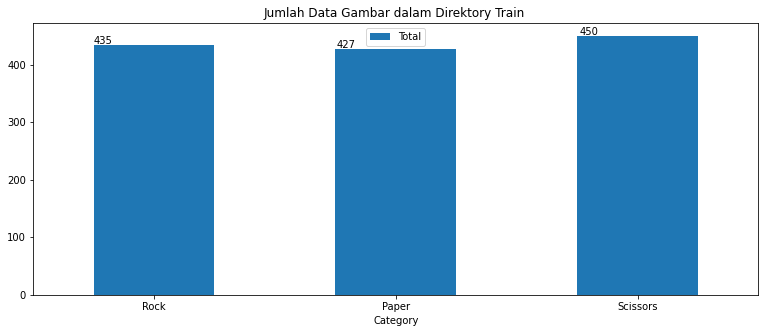

In [54]:
data_dir = pd.DataFrame({'Category': ['Rock', 'Paper', 'Scissors'], 'Total': [jmltrainrock, jmltrainpaper, jmltrainsci]})
ax = data_dir.plot.bar(x='Category', y='Total', rot=0, figsize=(13, 5))
plt.title('Jumlah Data Gambar dalam Direktory Train ')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [55]:
# meng-copy data training ke dalam direktori baru menggunakan library shutil
import shutil
for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [56]:
# mengecek jumlah data validation
jmlvalrock = len(os.listdir('/content/drive/MyDrive/MachineLearningProject/rockpaperscissors/validation/rock'))
jmlvalpaper = len(os.listdir('/content/drive/MyDrive/MachineLearningProject/rockpaperscissors/validation/paper'))
jmlvalsci = len(os.listdir('/content/drive/MyDrive/MachineLearningProject/rockpaperscissors/validation/scissors'))
print("Jumlah data validation kategori rock: ", jmlvalrock)
print("Jumlah data validation kategori paper: ", jmlvalpaper)
print("Jumlah data validation kategori scissors: ", jmlvalsci)

Jumlah data validation kategori rock:  291
Jumlah data validation kategori paper:  285
Jumlah data validation kategori scissors:  300


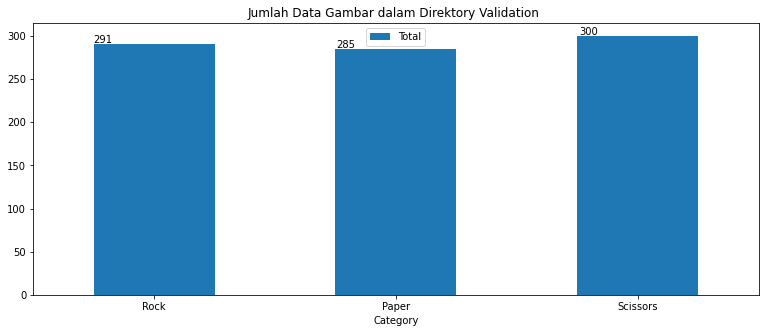

In [57]:
data_dir = pd.DataFrame({'Category': ['Rock', 'Paper', 'Scissors'], 'Total': [jmlvalrock, jmlvalpaper, jmlvalsci]})
ax = data_dir.plot.bar(x='Category', y='Total', rot=0, figsize=(13, 5))
plt.title('Jumlah Data Gambar dalam Direktory Validation ')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

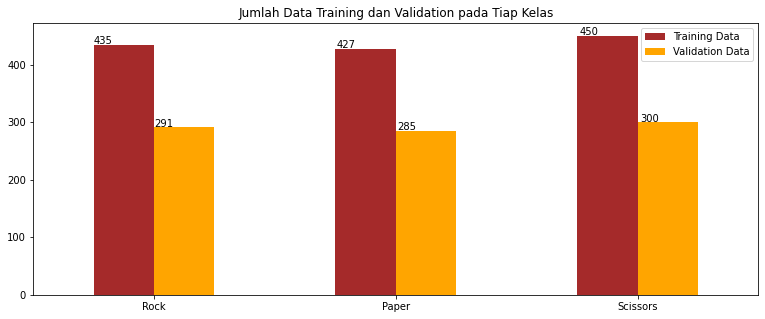

In [58]:
# visualisasi jumlah data training dan data validation
tr = [jmltrainrock, jmltrainpaper, jmltrainsci]
va = [jmlvalrock, jmlvalpaper, jmlvalsci]
index = ['Rock', 'Paper', 'Scissors']
data_am = pd.DataFrame({'Training Data': tr, 'Validation Data': va}, index=index)
ax = data_am.plot.bar(rot=0, color=['brown', 'orange'], figsize=(13,5))
ax.set_title("Jumlah Data Training dan Validation pada Tiap Kelas")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [92]:
# membuat image data generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [101]:
# menggunakan image data generator pada data training dan data validation
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [102]:
# membangun model Convolutional Neural Network
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'sigmoid')
])

In [103]:
# melihat ringkasan dari model CNN yang telah dibangun
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [108]:
# menggunakan callback yang akan menghentikan training apabila akurasi sudah mencapai 97%
accuracythreshold = 99e-2
class AccCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') >= accuracythreshold):   
          print("\nMencapai akurasi %2.2f%% , training dihentikan!" %(accuracythreshold*100))   
          self.model.stop_training = True

In [105]:
# mengcompile model Convolutional Neural Network
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [109]:
# training model Convolutional Neural Network
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks=[AccCallback()])

Epoch 1/20
25/25 - 31s - loss: 0.0660 - accuracy: 0.9775 - val_loss: 0.4717 - val_accuracy: 0.8062
Epoch 2/20
25/25 - 30s - loss: 0.0530 - accuracy: 0.9787 - val_loss: 0.9534 - val_accuracy: 0.7375
Epoch 3/20
25/25 - 30s - loss: 0.0588 - accuracy: 0.9800 - val_loss: 1.1000 - val_accuracy: 0.6625
Epoch 4/20
25/25 - 30s - loss: 0.0233 - accuracy: 0.9937 - val_loss: 1.2729 - val_accuracy: 0.7188

Mencapai akurasi 99.00% , training dihentikan!


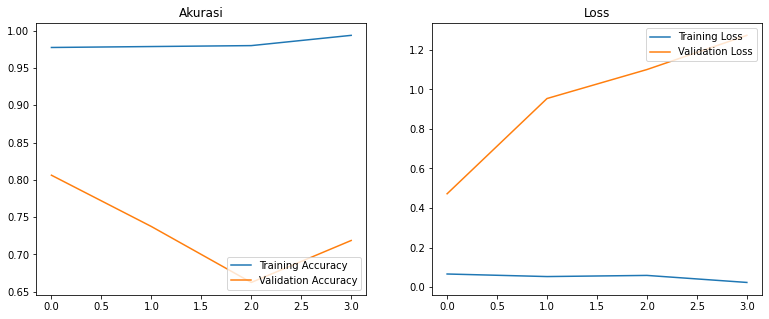

In [110]:
# visualisasi akurasi dan loss pada model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Akurasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [111]:
#membuat datafame file gambar
datagen_kwargs = dict(rescale=1./255, validation_split=.40)
dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                   interpolation="bilinear")# 

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    base_dir, subset="validation", shuffle=False, **dataflow_kwargs)

do_data_augmentation = False
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2,
      **datagen_kwargs)
else:
  train_datagen = valid_datagen
train_generator = train_datagen.flow_from_directory(
    base_dir, subset="training", shuffle=True, **dataflow_kwargs)

Found 2623 images belonging to 7 classes.
Found 3941 images belonging to 7 classes.


In [112]:
do_fine_tuning = False

In [113]:
print("Building model with", model_handle)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1024)              1529968   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 7175      
Total params: 1,537,143
Trainable params: 7,175
Non-trainable params: 1,529,968
_________________________________________________________________


In [114]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])


In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // valid_generator.batch_size
hist = model.fit(
    train_generator,
    epochs=5, steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps).history


Epoch 1/5
123/123 [==============================] - 71s 542ms/step - loss: 1.7568 - accuracy: 0.3001 - val_loss: 1.8543 - val_accuracy: 0.3681
Epoch 2/5
123/123 [==============================] - 66s 533ms/step - loss: 1.5096 - accuracy: 0.3837 - val_loss: 1.8708 - val_accuracy: 0.5046
Epoch 3/5
123/123 [==============================] - 66s 533ms/step - loss: 1.5037 - accuracy: 0.3878 - val_loss: 1.9719 - val_accuracy: 0.5231
Epoch 4/5
 44/123 [=========>....................] - ETA: 34s - loss: 1.4848 - accuracy: 0.3777

In [ ]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

In [ ]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

In [95]:
print("Membangun Model Dengan", model_handle)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()



Membangun Model Dengan https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1024)              1529968   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 7175      
Total params: 1,537,143
Trainable params: 7,175
Non-trainable params: 1,529,968
_________________________________________________________________


In [96]:
# membangun model Convolutional Neural Network
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'sigmoid')
])

In [97]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [98]:
# menggunakan callback yang akan menghentikan training apabila akurasi sudah mencapai 97%
accuracythreshold = 97e-2
class AccCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') >= accuracythreshold):   
          print("\nMencapai akurasi %2.2f%% , training dihentikan!" %(accuracythreshold*100))   
          self.model.stop_training = True

In [99]:

# mengcompile model Convolutional Neural Network

model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [100]:

# training model Convolutional Neural Network
# training model Convolutional Neural Network
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = valid_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks=[ AccCallback()])

Epoch 1/20


InvalidArgumentError: ignored